<a href="https://colab.research.google.com/github/DLSireesha/Weather_Prediction/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,accuracy_score,confusion_matrix

In [100]:
data=pd.read_csv("/content/playsheet_dataset.csv")
data.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [102]:
data.describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,f,yes
freq,5,6,7,8,9


In [103]:
data.isnull().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

In [104]:
data['Outlook'].value_counts()

Rainy       5
Sunny       5
Overcast    4
Name: Outlook, dtype: int64

In [105]:
data['Temp'].value_counts()

Mild    6
Hot     4
Cool    4
Name: Temp, dtype: int64

In [106]:
data['Humidity'].value_counts()

High      7
Normal    7
Name: Humidity, dtype: int64

In [107]:
data['Windy'].value_counts()

f    8
t    6
Name: Windy, dtype: int64

In [108]:
data['Play'].value_counts()

yes    9
no     5
Name: Play, dtype: int64

In [109]:
data.replace({'Outlook':{'Rainy':0,'Sunny':1,'Overcast':2}},inplace=True)
data.replace({'Temp':{'Mild':0,'Hot':1,'Cool':2}},inplace=True)
data.replace({'Humidity':{'Normal':0,'High':1}},inplace=True)
data.replace({'Windy':{'f':0,'t':1}},inplace=True)
data.replace({'Play':{'yes':0,'no':1}},inplace=True)
data.head()

,Outlook,Temp,Humidity,Windy,Play
0,0,1,1,0,1
1,0,1,1,1,1
2,2,1,1,0,0
3,1,0,1,0,0
4,1,2,0,0,0


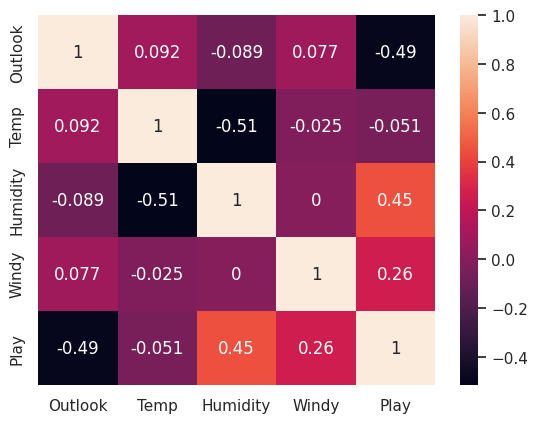

In [110]:
c=data.corr()
sns.set_theme(style='white')
sns.heatmap(c,annot=True)
plt.show()

In [111]:
x=data.iloc[ : , :-1]
y=data.iloc[ : ,-1]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [113]:
l=GaussianNB()
l.fit(x_train,y_train)

GaussianNB()

In [114]:
y_pred=l.predict(x_train)
print("classification report:\n",classification_report(y_pred,y_train))
print('accuracy score:',accuracy_score(y_pred,y_train))
print('Confusion matrix:\n',confusion_matrix(y_pred,y_train))

classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.75      0.75      0.75         4

    accuracy                           0.82        11
   macro avg       0.80      0.80      0.80        11
weighted avg       0.82      0.82      0.82        11

accuracy score: 0.8181818181818182
Confusion matrix:
 [[6 1]
 [1 3]]


In [115]:
x_p=l.predict(x_test)
print("classification report:\n",classification_report(x_p,y_test))
print('accuracy score:',accuracy_score(x_p,y_test))
print('Confusion matrix:\n',confusion_matrix(x_p,y_test))

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

accuracy score: 1.0
Confusion matrix:
 [[2 0]
 [0 1]]
